ITC COMMUNICATION SYSTEM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio

In [ ]:
path = 'sample-6s.mp3'

sampled audio array [ 0.01353102 -0.01571936  0.00032979 ... -0.02741544 -0.03242036
 -0.04139558]
number of sampled points 140928


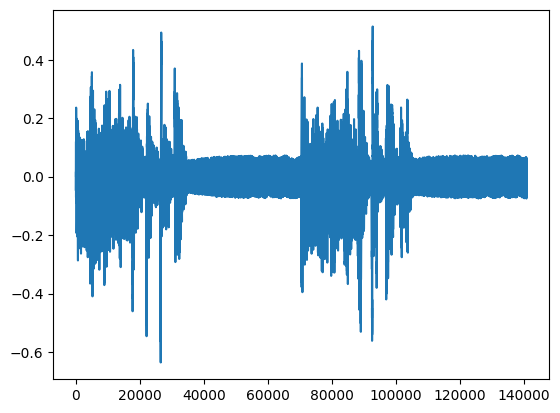

In [ ]:
def sample_audio(path):
  audio_points, fs = librosa.load(path, sr=22050)
  return audio_points,fs

audio_array,fs = sample_audio(path)
print('sampled audio array',audio_array)
print('number of sampled points',len(audio_array))
plt.plot(audio_array)
Audio(data=audio_array, rate=fs, autoplay=False)


QUANTIZATION

In [ ]:
def quantization(sampled_audio, quant_levels):
  L = quant_levels
  maxi = max(sampled_audio)
  mini = min(sampled_audio)
  step = (maxi-mini)/L

  level = []
  for i in range(L):
    quant_level = mini + step
    level.append(quant_level)
    mini = mini + step
  distance = []
  quantized_audio = []

  for i in sampled_audio:
    for j in level:
      distance.append(abs(i-j))
    ind = distance.index(min(distance))
    quantized_audio.append(level[ind])
    distance.clear()

  return level,quantized_audio


quantization levels [-0.6179236378520727, -0.5999583415687084, -0.5819930452853441, -0.5640277490019798, -0.5460624527186155, -0.5280971564352512, -0.5101318601518869, -0.49216656386852264, -0.47420126758515835, -0.45623597130179405, -0.43827067501842976, -0.42030537873506546, -0.40234008245170116, -0.38437478616833687, -0.3664094898849726, -0.3484441936016083, -0.330478897318244, -0.3125136010348797, -0.2945483047515154, -0.2765830084681511, -0.2586177121847868, -0.2406524159014225, -0.2226871196180582, -0.2047218233346939, -0.1867565270513296, -0.16879123076796532, -0.15082593448460102, -0.13286063820123672, -0.11489534191787243, -0.09693004563450813, -0.07896474935114384, -0.06099945306777954, -0.043034156784415245, -0.02506886050105095, -0.007103564217686653, 0.010861732065677643, 0.02882702834904194, 0.046792324632406235, 0.06475762091577053, 0.08272291719913483, 0.10068821348249912, 0.11865350976586342, 0.13661880604922771, 0.154584102332592, 0.1725493986159563, 0.190514694899320

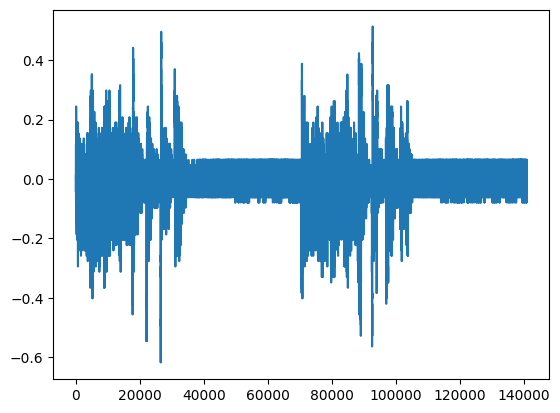

In [ ]:
L =  64

level,quant_audio = quantization(audio_array,L)

print('quantization levels',level[:100])
print('quantized signal',quant_audio[:100])
plt.plot(quant_audio)

In [ ]:

def encode_audio(audio):
  encoded_signal = []
  encoded_string = ''
  encode_dict = {}
  no_of_bits = np.log2(L)
  for i in audio:
    index = level.index(i) 
    binary = bin(index)[2:]
    code = int(no_of_bits-len(binary))*'0' +binary
    encoded_signal.append(code)
    encoded_string += code
    encode_dict[code] = i
  return encoded_signal,encoded_string,encode_dict

encoded_signal,encoded_string,encode_dict = encode_audio(quant_audio)
print("Encoded signal =",np.array(encoded_signal))
print("Encoded string =",encoded_string)
print("Encoding dict =",encode_dict)

Encoded signal = ['100011' '100010' '100010' ... '100001' '100001' '100000']
Encoded string = 100011100010100010100010100000100001100001100011100001100001100001100010100100100011100011101000100110100111101000100111100111100110101001100101100101100111101001100110100101100011100010100110100101100010100010100100011110100000100011100010100000100011100001100001100100100010100010100100100110101000101000100110100101100100100101100100100001100011100110100111101000101001101011101000101001101010100111101001101000101001101000101001100111101010101011101001101100101011101011101001101100110000101110101100101011101011101100101011101001101001101000100111100101100101100101100111101001101010101011101001101100101010100110101001100111100111101000101001100110100100100101100110101010101010101000101001101100101011101010101100101001101000100110101000101001100111101010101000100110100111100101100010100011100101100101100000100001100000011101100010100001011110011111100001100000100000100010100011100011100101100110

In [ ]:
#grouping 
def hamming_grp(msg):

  while len(msg) % 4 != 0:
    msg = msg + '0'

  #group into k bits
  grouped_enc_sig = []
  k = 4
  for i in range(0,len(msg),k):

    grouped_enc_sig.append(msg[i:i+k])
  
  return grouped_enc_sig

grouped_signal = hamming_grp(encoded_string)

print(grouped_signal)

['1000', '1110', '0010', '1000', '1010', '0010', '1000', '0010', '0001', '1000', '0110', '0011', '1000', '0110', '0001', '1000', '0110', '0010', '1001', '0010', '0011', '1000', '1110', '1000', '1001', '1010', '0111', '1010', '0010', '0111', '1001', '1110', '0110', '1010', '0110', '0101', '1001', '0110', '0111', '1010', '0110', '0110', '1001', '0110', '0011', '1000', '1010', '0110', '1001', '0110', '0010', '1000', '1010', '0100', '0111', '1010', '0000', '1000', '1110', '0010', '1000', '0010', '0011', '1000', '0110', '0001', '1001', '0010', '0010', '1000', '1010', '0100', '1001', '1010', '1000', '1010', '0010', '0110', '1001', '0110', '0100', '1001', '0110', '0100', '1000', '0110', '0011', '1001', '1010', '0111', '1010', '0010', '1001', '1010', '1110', '1000', '1010', '0110', '1010', '1001', '1110', '1001', '1010', '0010', '1001', '1010', '0010', '1001', '1001', '1110', '1010', '1010', '1110', '1001', '1011', '0010', '1011', '1010', '1110', '1001', '1011', '0011', '0000', '1011', '1010',

CHANNEL CODING HAMMING CODE


In [ ]:
def hamming_encode(enc_msg):
  hamming_signal = []

  G = np.array([[1, 0, 0, 0, 0, 1, 1],
                  [0, 1, 0, 0, 1, 0, 1],
                  [0, 0, 1, 0, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1]])
  for i in enc_msg:
    data = []
    code = ''
    for j in i:
      data.append(int(j))
    data = np.array(data)
    codeword = np.dot(data.T, G) % 2
    codeword = codeword.flatten()
    for i in codeword:
      code += str(i)
    hamming_signal.append(code)

  return hamming_signal
hamming_signal = hamming_encode(grouped_signal)
print('Haming Coded signal',np.array(hamming_signal))

Haming Coded signal ['1000011' '1110000' '0010110' ... '1000011' '0110011' '0000000']


MPSK

In [ ]:
from numpy.lib.npyio import unpackbits
#join all grouped string to single string
def grouping_bits(msg,M):
  bits = []
  for i in hamming_signal:
    for j in i:
      bits.append(j)

  num = np.log2(M)
  grouped_array = []
  temp = ''
  for i in bits:
    temp = temp + i

    if(len(temp)==num):
      grouped_array.append(temp)
      temp = ''
  return np.array(grouped_array)


grouped_array =grouping_bits(hamming_signal,2)
unique_array = list(set(grouped_array))
unique_array


['0', '1']

In [ ]:
#generating symbols

def generate_symbol(M):
  Es = 1
  i = np.arange(1,M+1)
  symbol_array = np.sqrt(Es)*np.cos(2*np.pi*(i-1)/M) + 1j*np.sqrt(Es)*np.sin(2*np.pi*(i-1)/M)
  symbol_array = np.round(symbol_array,4)

  dictionary_1 = {}
  for i in range(len(symbol_array)):
    dictionary_1[unique_array[i]] = symbol_array[i]
    
  dictionary_2 = {}
  for i in range(len(symbol_array)):

    dictionary_2[symbol_array[i]] = unique_array[i]
  
  return symbol_array,dictionary_1,dictionary_2

symbols,map_dict,demap_dict = generate_symbol(2)
print(symbols)
print(map_dict)

[ 1.+0.j -1.+0.j]
{'0': (1+0j), '1': (-1+0j)}


In [ ]:
#mapping
def mapping(msg):
  mapped_array = []
  for i in msg:
    mapped_array.append(map_dict[i])

  return np.array(mapped_array)

mapped_signal = mapping(grouped_array)
print('mapped signal',mapped_signal)

mapped signal [-1.+0.j  1.+0.j  1.+0.j ...  1.+0.j  1.+0.j  1.+0.j]


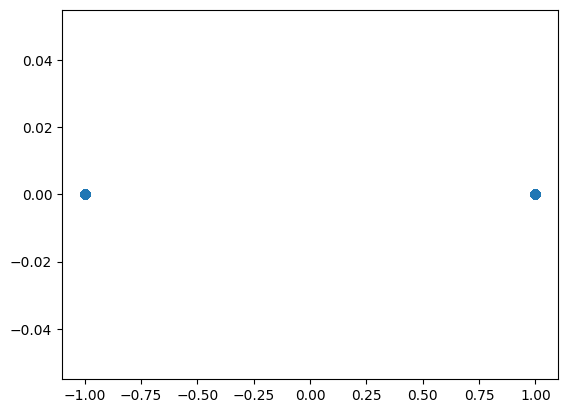

In [ ]:
#plotting diagram

plt.scatter(np.real(mapped_signal),np.imag(mapped_signal))

In [ ]:
#generating noise
def generate_noise(db):
    
    var = 1/(10**(db/10))
    awgn = np.random.normal(0,np.sqrt(var/2),len(mapped_signal)) + 1j*np.random.normal(0,np.sqrt(var/2),len(mapped_signal))
    return awgn



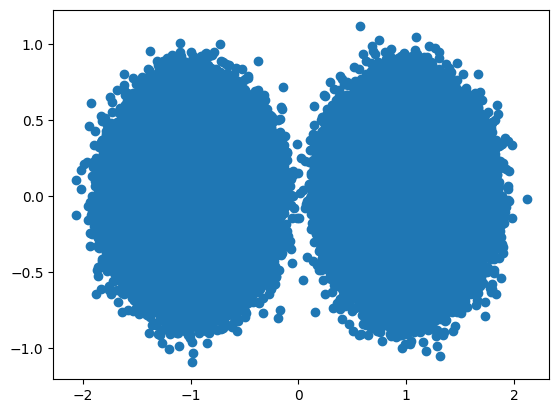

In [ ]:
#adding noise

noise = generate_noise(10)
rec_signal = noise + mapped_signal
plt.scatter(np.real(rec_signal),np.imag(rec_signal))

In [ ]:
#DECODING
import math
def demapping(rec_signal):
  distance = []
  decoded_signal=[]
  for i in rec_signal:

    for j in range(len(symbols)):
        p1 = [np.real(i),np.imag(i)]
        p2 = [np.real(symbols[j]),np.imag(symbols[j])]
        dist = math.dist(p1,p2)
        distance.append(dist)
        
    mini = min(distance)
    ind = distance.index(mini)
    decoded_signal.append(demap_dict[symbols[ind]])
    distance = []

  rec_bits = []

  for i in decoded_signal:
    for j in i:
      rec_bits.append(int(j))

  rec_bits_s =[]
  for i in rec_bits :
    rec_bits_s.append(str(i))
  return np.array(rec_bits_s)


rec_bits = demapping(rec_signal)

rec_bits

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [ ]:
#group the bits for hamming decoding
def group_bits(msg,num):

  grouped_array = []
  temp = ''
  for i in msg:
    temp = temp + i

    if(len(temp)==num):
      grouped_array.append(temp)
      temp = ''
  return np.array(grouped_array)

hamming_decode_ip = group_bits(rec_bits,7)
hamming_decode_ip


array(['1000011', '1110000', '0010110', ..., '1000011', '0110011',
       '0000000'], dtype='<U7')

In [ ]:
#hamming decode
'''
def hamming_decode(msg):

  hamming_dec_sig = []
  hamming_dec_string =''
  #parity check matrix

  H = np.array([[1, 0, 1, 0, 1, 0, 1],
                  [0, 1, 1, 0, 0, 1, 1],
                  [0, 0, 0, 1, 1, 1, 1]])
  


  for i in msg:
    code = []
    data_str = ''


    for j in i:
      code.append(int(j))
    codeword_vector = np.array(code).reshape(7, 1)
    syndrome = np.dot(H, codeword_vector) % 2
    syndrome = syndrome.flatten()
    syndrome_st = ''
    for i in syndrome:
      syndrome_st += str(i)
    error_position = int(syndrome_st, 2)
    if error_position == 0:
        data = code[2:6]
    else:
        code[error_position - 1] = 1 - code[error_position - 1]
        data = code[2:6]

    for i in data:
        data_str += str(i)

    hamming_dec_sig.append(data_str)
    hamming_dec_string += data_str

  return hamming_dec_sig, hamming_dec_string



hamming_dec_signal ,hamming_decode_string = hamming_decode(hamming_decode_ip)
print(hamming_dec_signal[:100])

['0001', '1000', '1011', '0001', '1010', '1011', '0001', '1011', '0111', '0001', '1001', '1100', '0001', '1001', '0111', '0001', '1001', '1011', '0110', '1011', '1100', '0001', '1000', '0001', '0110', '1010', '1110', '1010', '1011', '1110', '0110', '1000', '1001', '1010', '1001', '0101', '0110', '1001', '1110', '1010', '1001', '1001', '0110', '1001', '1100', '0001', '1010', '1001', '0110', '1001', '1011', '0001', '1010', '0010', '1110', '1010', '0000', '0001', '1000', '1011', '0001', '1011', '1100', '0001', '1001', '0111', '0110', '1011', '1011', '0001', '1010', '0010', '0110', '1010', '0001', '1010', '1011', '1001', '0110', '1001', '0010', '0110', '1001', '0010', '0001', '1001', '1100', '0110', '1010', '1110', '1010', '1011', '0110', '1010', '1000', '0001', '1010', '1001', '1010', '0110']


In [ ]:
def decode_hamming(audio):
  hamm_dec_signal = []
  hamm_dec_string = ''
  H = np.array([[0, 1, 1, 1, 1, 0, 0],
                  [1, 0, 1, 1, 0, 1, 0],
                  [1, 1, 0, 1, 0, 0, 1]])
  for i in audio:
    codeword = []
    data_str = ''
    for j in i:
      codeword.append(int(j))
    codeword_vector = np.array(codeword).reshape(7, 1)
    syndrome = np.dot(codeword_vector.T,H.T) % 2
    syndrome = syndrome.flatten()
    syndrome_st = ''
    for i in syndrome:
      syndrome_st += str(i)
    error_position = int(syndrome_st,2)
    if error_position == 0:
      data = codeword[:4]
    else:
      codeword[error_position - 1] = 1 - codeword[error_position - 1]
      data = codeword[:4]
    
    for i in data:
      data_str += str(i)
    
    hamm_dec_signal.append(data_str)
    hamm_dec_string += data_str
    
  return hamm_dec_signal,hamm_dec_string

hamm_dec_signal,hamm_dec_string = decode_hamming(hamming_decode_ip)
print('hamming decoded signal =',np.array(hamm_dec_signal))
print('hamming decoded string =',hamm_dec_string)

hamming decoded signal = ['1000' '1110' '0010' ... '1000' '0110' '0000']
hamming decoded string = 10001110001010001010001010000010000110000110001110000110000110000110001010010010001110001110100010011010011110100010011110011110011010100110010110010110011110100110011010010110001110001010011010010110001010001010010001111010000010001110001010000010001110000110000110010010001010001010010010011010100010100010011010010110010010010110010010000110001110011010011110100010100110101110100010100110101010011110100110100010100110100010100110011110101010101110100110110010101110101110100110110011000010111010110010101110101110110010101110100110100110100010011110010110010110010110011110100110101010101110100110110010101010011010100110011110011110100010100110011010010010010110011010101010101010100010100110110010101110101010110010100110100010011010100010100110011110101010100010011010011110010110001010001110010110010110000010000110000001110110001010000101111001111110000110000010000010001010001110001110010110

In [ ]:
#after hamming decoding we get the bits individually and a group of 4
#grouping bits

def grouping(msg,L):
  hamm_dec_grouped_sig = []

  k =int(np.log2(L))

  for i in range(0,len(msg),k):

    hamm_dec_grouped_sig.append(msg[i:i+k])
  return hamm_dec_grouped_sig

grouped_sig = grouping(hamm_dec_string,64)
grouped_sig

['100011',
 '100010',
 '100010',
 '100010',
 '100000',
 '100001',
 '100001',
 '100011',
 '100001',
 '100001',
 '100001',
 '100010',
 '100100',
 '100011',
 '100011',
 '101000',
 '100110',
 '100111',
 '101000',
 '100111',
 '100111',
 '100110',
 '101001',
 '100101',
 '100101',
 '100111',
 '101001',
 '100110',
 '100101',
 '100011',
 '100010',
 '100110',
 '100101',
 '100010',
 '100010',
 '100100',
 '011110',
 '100000',
 '100011',
 '100010',
 '100000',
 '100011',
 '100001',
 '100001',
 '100100',
 '100010',
 '100010',
 '100100',
 '100110',
 '101000',
 '101000',
 '100110',
 '100101',
 '100100',
 '100101',
 '100100',
 '100001',
 '100011',
 '100110',
 '100111',
 '101000',
 '101001',
 '101011',
 '101000',
 '101001',
 '101010',
 '100111',
 '101001',
 '101000',
 '101001',
 '101000',
 '101001',
 '100111',
 '101010',
 '101011',
 '101001',
 '101100',
 '101011',
 '101011',
 '101001',
 '101100',
 '110000',
 '101110',
 '101100',
 '101011',
 '101011',
 '101100',
 '101011',
 '101001',
 '101001',
 '101000',

In [ ]:
#mapping the bits

def decode_map(msg):
  rec_audio = []

  for i in msg:

    rec_audio.append(encode_dict[i])
  return rec_audio

recieved_audio = decode_map(np.array(grouped_sig))
print(recieved_audio[:100])

[0.010861732065677643, -0.007103564217686653, -0.007103564217686653, -0.007103564217686653, -0.043034156784415245, -0.02506886050105095, -0.02506886050105095, 0.010861732065677643, -0.02506886050105095, -0.02506886050105095, -0.02506886050105095, -0.007103564217686653, 0.02882702834904194, 0.010861732065677643, 0.010861732065677643, 0.10068821348249912, 0.06475762091577053, 0.08272291719913483, 0.10068821348249912, 0.08272291719913483, 0.08272291719913483, 0.06475762091577053, 0.11865350976586342, 0.046792324632406235, 0.046792324632406235, 0.08272291719913483, 0.11865350976586342, 0.06475762091577053, 0.046792324632406235, 0.010861732065677643, -0.007103564217686653, 0.06475762091577053, 0.046792324632406235, -0.007103564217686653, -0.007103564217686653, 0.02882702834904194, -0.07896474935114384, -0.043034156784415245, 0.010861732065677643, -0.007103564217686653, -0.043034156784415245, 0.010861732065677643, -0.02506886050105095, -0.02506886050105095, 0.02882702834904194, -0.0071035642

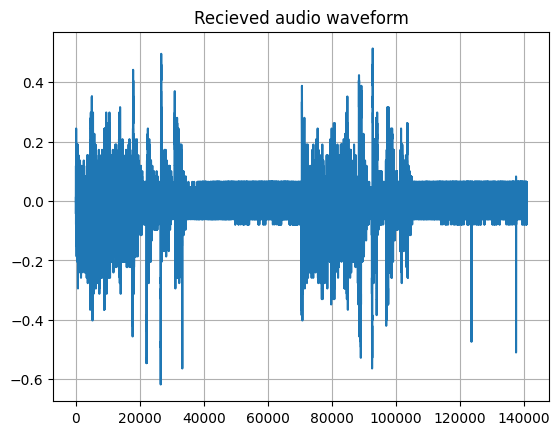

In [ ]:
#plot and play the audio

plt.plot(recieved_audio); plt.grid();plt.title('Recieved audio waveform');plt.show()
display(Audio(data=recieved_audio, rate=fs))